In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.metrics import roc_curve
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import log_loss

from time import time

In [2]:
pd.set_option("display.max.columns", None)

In [3]:
X_test = pd.read_csv('../data/X_test.csv').drop('Unnamed: 0', axis=1)
X_train = pd.read_csv('../data/X_train.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('../data/y_test.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('../data/y_train.csv').drop('Unnamed: 0', axis=1)

# Default model

In [4]:
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), 
         xgb.XGBClassifier(objective='binary:logistic'), DummyClassifier()]

In [5]:
default_scores = []

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    default_scores.append(score)
    print(str(model), score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 0.6152
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 0.54
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False,

In [6]:
model_names = ['LR', 'KNN', 'RFC', 'XGB', 'Dummy']

In [7]:
default_scores

[0.6152, 0.54, 0.616, 0.6202, 0.5016]

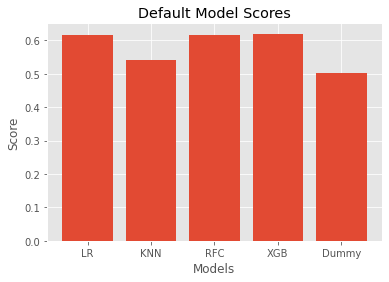

In [8]:
_ = plt.bar(model_names, default_scores)
_ = plt.title('Default Model Scores')
_ = plt.ylabel('Score')
_ = plt.xlabel('Models')
plt.show()

In [9]:
logreg = LogisticRegression(random_state=123)

logreg.fit(X_train, y_train)

pred_lr = logreg.predict(X_test)

In [10]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

In [11]:
xgbcl = xgb.XGBClassifier(objective='binary:logistic', seed=123)

xgbcl.fit(X_train, y_train)

pred_xgb = xgbcl.predict(X_test)

In [12]:
rfc = RandomForestClassifier(random_state=123)

rfc.fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)

# Logistic Regression

In [19]:
print('LR precision score = {}'.format(precision_score(y_test, pred_lr)))
print('LR recall score = {}'.format(recall_score(y_test, pred_lr)))
print('LR F1 score = {}'.format(f1_score(y_test, pred_lr)))

LR precision score = 0.6147859922178989
LR recall score = 0.4161545215100966
LR F1 score = 0.49633507853403136


In [21]:
confusion_matrix(pred_lr, y_test)

array([[2128, 1330],
       [ 594,  948]])

In [13]:
start = time()

c_space = [0.01,0.1,1,10,100]
multi_class = ['auto', 'ovr', 'multinomial']
max_iter = [1,10,100,200]

params = {'C': c_space, 
          'multi_class':multi_class,
          'max_iter':max_iter
         }

lr_gs = GridSearchCV(logreg, param_grid=params, cv=5)

lr_gs.fit(X_train, y_train)

stop = time()

total_time = stop - start

print(total_time, 'seconds to run')

68.62134122848511 seconds to run


In [14]:
lr_gs.best_params_

{'C': 100, 'max_iter': 200, 'multi_class': 'auto'}

In [15]:
lr_gs.best_score_

0.6245999999999999

In [16]:
pred_lrgs = lr_gs.predict(X_test) 

In [22]:
confusion_matrix(pred_lrgs, y_test)

array([[2140, 1345],
       [ 582,  933]])

In [23]:
print('Grid search LR precision score = {}'.format(precision_score(y_test, pred_lrgs)))
print('Grid search LR recall score= {}'.format(recall_score(y_test, pred_lrgs)))
print('Grid search LR F1 score = {}'.format(f1_score(y_test, pred_lrgs)))

Grid search logistic regression precision score = 0.6158415841584158
Grid search logistic regression recall score= 0.40956979806848115
Grid search logistic regression F1 score = 0.4919588716055893


In [25]:
test = LogisticRegression(C=lr_gs.best_params_['C'], max_iter=lr_gs.best_params_['max_iter'],
                          multi_class=lr_gs.best_params_['multi_class'])
test.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
test.score(X_test, y_test)

0.6146

In [28]:
print(classification_report(y_test, pred_lrgs))

              precision    recall  f1-score   support

         0.0       0.61      0.79      0.69      2722
         1.0       0.62      0.41      0.49      2278

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.59      5000
weighted avg       0.61      0.61      0.60      5000



In [83]:
prob_lr = logreg.predict_proba(X_test)

In [80]:
prob_lr_gs = lr_gs.predict_proba(X_test)

print('log loss is equal to', log_loss(y_test, prob_lr_gs))

log loss is equal to 0.6472235399153582


# K Nearest Neighbors

In [32]:
print('KNN precision score = {}'.format(precision_score(y_test, pred_knn)))
print('KNN recall score = {}'.format(recall_score(y_test, pred_knn)))
print('KNN F1 score = {}'.format(f1_score(y_test, pred_knn)))

KNN precision score = 0.4951627088830255
KNN recall score = 0.4942932396839333
KNN F1 score = 0.49472759226713536


In [33]:
confusion_matrix(pred_knn, y_test)

array([[1574, 1152],
       [1148, 1126]])

In [34]:
start=time()

scores = []

for n in range(1,202, 15):
    knn_ = KNeighborsClassifier(n_neighbors=n)
    
    knn_.fit(X_train, y_train)
    
    score = knn_.score(X_test, y_test)
    
    scores.append(knn_.score(X_test, y_test))
    
    print('For {} neighbor/s the score is: {}'.format(n, score))
    
stop = time()

total_time = (stop - start)

print(round(total_time, 2), 'seconds to run')

For 1 neighbor/s the score is: 0.5264
For 16 neighbor/s the score is: 0.5602
For 31 neighbor/s the score is: 0.5654
For 46 neighbor/s the score is: 0.5768
For 61 neighbor/s the score is: 0.574
For 76 neighbor/s the score is: 0.5684
For 91 neighbor/s the score is: 0.5632
For 106 neighbor/s the score is: 0.5668
For 121 neighbor/s the score is: 0.5704
For 136 neighbor/s the score is: 0.5746
For 151 neighbor/s the score is: 0.5796
For 166 neighbor/s the score is: 0.5766
For 181 neighbor/s the score is: 0.5756
For 196 neighbor/s the score is: 0.5672
390.47 seconds to run


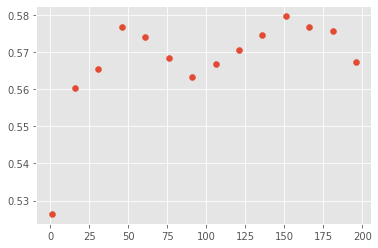

In [36]:
_ = plt.scatter(range(1,202, 15), scores)
_ = plt.label('K Nearest Neighbors')
_ = plt.xlabel('k value')
_ = plt.ylabel('score')

plt.show()

In [39]:
mod_knn = KNeighborsClassifier(n_neighbors=151)

mod_knn.fit(X_train, y_train)

pred_mod_knn = knn.predict(X_test)

In [40]:
print('Mod KNN precision score = {}'.format(precision_score(y_test, pred_mod_knn)))
print('Mod KNN recall score = {}'.format(recall_score(y_test, pred_mod_knn)))
print('Mod KNN F1 score = {}'.format(f1_score(y_test, pred_mod_knn)))

Mod KNN precision score = 0.4951627088830255
Mod KNN recall score = 0.4942932396839333
Mod KNN F1 score = 0.49472759226713536


In [41]:
confusion_matrix(pred_mod_knn, y_test)

array([[1574, 1152],
       [1148, 1126]])

In [42]:
print(classification_report(y_test, pred_mod_knn))

              precision    recall  f1-score   support

         0.0       0.58      0.58      0.58      2722
         1.0       0.50      0.49      0.49      2278

    accuracy                           0.54      5000
   macro avg       0.54      0.54      0.54      5000
weighted avg       0.54      0.54      0.54      5000



In [84]:
prob_knn = knn.predict_proba(X_test)

In [79]:
prob_knn_mod = mod_knn.predict_proba(X_test)

print('log loss is equal to', log_loss(y_test, prob_knn_mod))

log loss is equal to 0.6764010336601752


# Random Forest Classifier

In [45]:
print('RFC precision = {}'.format(precision_score(y_test, pred_rfc)))
print('RFC recall = {}'.format(recall_score(y_test, pred_rfc)))
print('RFC F1 score = {}'.format(f1_score(y_test, pred_rfc)))

RFC precision = 0.5925315760571115
RFC recall = 0.4736611062335382
RFC F1 score = 0.5264698707001707


In [46]:
confusion_matrix(pred_rfc, y_test)

array([[1980, 1199],
       [ 742, 1079]])

In [48]:
start = time()

params = {'n_estimators':[10, 100, 1000],
        'criterion': ['gini', 'entropy'], 
        'max_depth':[None, 10, 20] 
         }

GridSearchCV(rfc, param_grid=params)

rfc_gs = GridSearchCV(rfc, param_grid=params, cv=5)

rfc_gs.fit(X_test, y_test)

stop = time()

total_time = stop - start

print(round(total_time, 2), 'seconds to run')

188.05 seconds to run


In [49]:
pred_rfcgs = rfc_cv.predict(X_test)

In [50]:
rfc_gs.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 1000}

In [51]:
rfc_gs.best_score_

0.6294000000000001

In [52]:
print('RFC rrecision = {}'.format(precision_score(y_test, pred_rfcgs)))
print('RFC recall = {}'.format(recall_score(y_test, pred_rfcgs)))
print('RFC F1 score = {}'.format(f1_score(y_test, pred_rfcgs)))

RFC rrecision = 0.832269297736506
RFC recall = 0.6294995610184372
RFC F1 score = 0.7168207948012995


In [53]:
confusion_matrix(pred_rfcgs, y_test)

array([[2433,  844],
       [ 289, 1434]])

In [54]:
confusion_matrix(pred_rfcgs, y_test, normalize='true')

array([[0.74244736, 0.25755264],
       [0.1677307 , 0.8322693 ]])

In [55]:
print(classification_report(y_test, pred_rfcgs))

              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81      2722
         1.0       0.83      0.63      0.72      2278

    accuracy                           0.77      5000
   macro avg       0.79      0.76      0.76      5000
weighted avg       0.78      0.77      0.77      5000



In [85]:
prob_rfc = rfc.predict_proba(X_test)

In [77]:
prob_rfc_gs = rfc_gs.predict_proba(X_test)

print('log loss is equal to', log_loss(y_test, prob_rfc_gs))

log loss is equal to 0.5448750800796693


# XGBoost

In [63]:
print('XGB precision = {}'.format(precision_score(y_test, pred_xgb)))
print('XGB recall = {}'.format(recall_score(y_test, pred_xgb)))
print('XGB F1 score = {}'.format(f1_score(y_test, pred_xgb)))

XGB precision = 0.5968318855390904
XGB recall = 0.5127304653204565
XGB F1 score = 0.5515938606847698


In [58]:
confusion_matrix(pred_xgb, y_test)

array([[1933, 1110],
       [ 789, 1168]])

In [59]:
start = time()

n_estimators = [1, 5, 10, 20, 30, 50]
max_depth = [1, 3, 10, None]

params = {'n_estimators': n_estimators,
          'max_depth':max_depth
         }

xgb_gs = GridSearchCV(xgbcl, param_grid=params, cv=5)

xgb_gs.fit(X_train, y_train)

stop = time()

total_time = stop - start

print(total_time, 'seconds to run')

43.035892963409424 seconds to run


In [66]:
pred_xgbgs = xgb_gs.predict(X_test)

In [61]:
xgb_gs.best_params_

{'max_depth': None, 'n_estimators': 20}

In [62]:
xgb_gs.best_score_

0.6306

In [67]:
print('Grid search XGB precision = {}'.format(precision_score(y_test, pred_xgbgs)))
print('Grid search XGB recall = {}'.format(recall_score(y_test, pred_xgbgs)))
print('Grid search XGB F1 score = {}'.format(f1_score(y_test, pred_xgbgs)))

Grid search XGB precision = 0.6170454545454546
Grid search XGB recall = 0.47673397717295873
Grid search XGB F1 score = 0.537890044576523


In [68]:
confusion_matrix(pred_xgbgs, y_test)

array([[2048, 1192],
       [ 674, 1086]])

In [70]:
print(classification_report(y_test, pred_xgbgs))

              precision    recall  f1-score   support

         0.0       0.63      0.75      0.69      2722
         1.0       0.62      0.48      0.54      2278

    accuracy                           0.63      5000
   macro avg       0.62      0.61      0.61      5000
weighted avg       0.63      0.63      0.62      5000



In [91]:
prob_xgbcl = xgbcl.predict_proba(X_test)

In [81]:
prob_xgb_gs = xgb_gs.predict_proba(X_test)

print('log loss is equal to', log_loss(y_test, prob_xgb_gs))

log loss is equal to 0.6460709331035615


In [89]:
prob_lr.shape

(5000, 2)

# Visualizing Models

In [92]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, prob_lr[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, prob_knn[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, prob_rfc[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_test, prob_xgbcl[:,1])
fpr5, tpr5, thresholds5 = roc_curve(y_test, prob_lr_gs[:,1])
fpr6, tpr6, thresholds6 = roc_curve(y_test, prob_knn_mod[:,1])
fpr7, tpr7, thresholds7 = roc_curve(y_test, prob_rfc_gs[:,1])
fpr8, tpr8, thresholds8 = roc_curve(y_test, prob_xgb_gs[:,1])

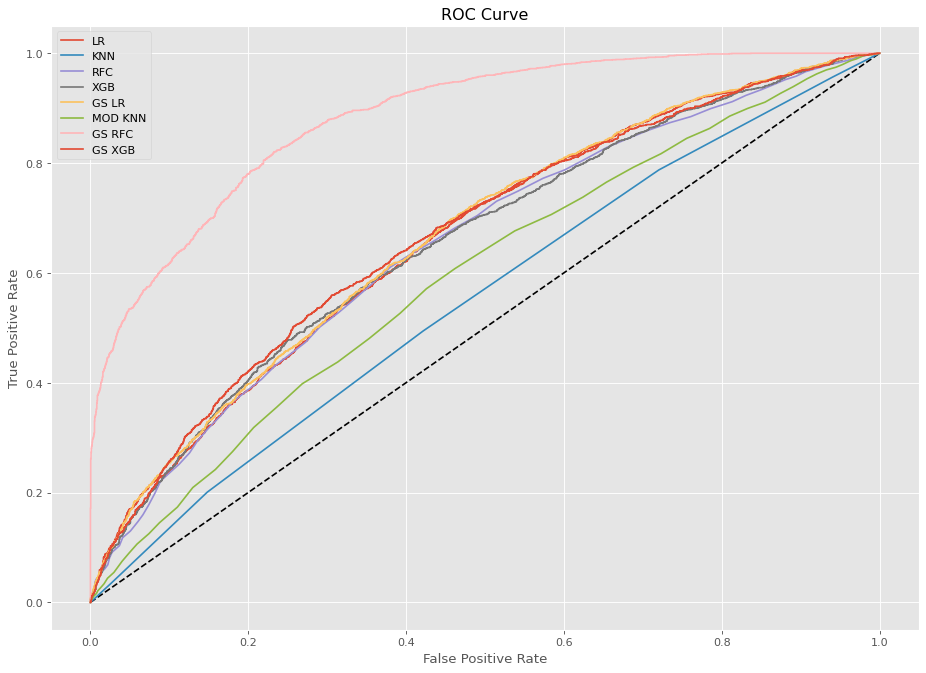

In [105]:
_ = figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr1, tpr1, label='LR')
_ = plt.plot(fpr2, tpr2, label='KNN')
_ = plt.plot(fpr3, tpr3, label='RFC')
_ = plt.plot(fpr4, tpr4, label='XGB')
_ = plt.plot(fpr5, tpr5, label='GS LR')
_ = plt.plot(fpr6, tpr6, label='MOD KNN')
_ = plt.plot(fpr7, tpr7, label='GS RFC')
_ = plt.plot(fpr8, tpr8, label='GS XGB')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.legend()

plt.savefig('../figures/ModelROCCurve.png')

In [107]:
rfc_gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [108]:
rfc_gs.cv_results_

{'mean_fit_time': array([0.06298246, 0.60997744, 5.90931277, 0.04352641, 0.37236524,
        3.58595119, 0.06009402, 0.53226314, 5.53029108, 0.07910705,
        0.71114187, 6.72728596, 0.05080194, 0.40283456, 3.8406004 ,
        0.0666358 , 0.61935673, 5.49444489]),
 'std_fit_time': array([0.00469863, 0.04359466, 0.33335309, 0.00187777, 0.01603594,
        0.12102001, 0.00451419, 0.00942707, 0.25800211, 0.00336611,
        0.05023464, 0.30214928, 0.0019564 , 0.02170451, 0.05846149,
        0.0068268 , 0.02696879, 0.16278352]),
 'mean_score_time': array([0.00501451, 0.03629117, 0.35517488, 0.00454144, 0.02607694,
        0.22292304, 0.00489149, 0.03156867, 0.31359072, 0.00609956,
        0.03792219, 0.34899569, 0.00478067, 0.02583432, 0.25604424,
        0.00484781, 0.03160367, 0.28487959]),
 'std_score_time': array([0.00035282, 0.00256924, 0.06828939, 0.00071138, 0.00212599,
        0.00530814, 0.00027144, 0.00180666, 0.02249668, 0.00066053,
        0.00141114, 0.02281183, 0.00049004, 